<a href="https://colab.research.google.com/github/alihussainia/Malaria_Edge_Detection/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Data Downloading

In [68]:
!wget  --backups=1 -q https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
!wget  --backups=1 -q https://ceb.nlm.nih.gov/proj/malaria#/malaria_cell_classification_code.zip
# List what you've downloaded:
!ls -al

total 841516
drwxr-xr-x 1 root root      4096 Mar  8 19:00 .
drwxr-xr-x 1 root root      4096 Mar  8 17:36 ..
-rw-r--r-- 1 root root 353452851 Apr  6  2018 cell_images.zip
drwxr-xr-x 1 root root      4096 Mar  3 18:11 .config
drwx------ 4 root root      4096 Mar  8 17:02 drive
-rw-r--r-- 1 root root      3772 Mar  8 17:39 infer.py
drwx------ 3 root root      4096 Mar  8 18:57 ir
drwxr-xr-x 4 root root      4096 Mar  8 17:35 l_openvino_toolkit_p_2020.1.023
-rw-r--r-- 1 root root 508213676 Feb 11 17:38 l_openvino_toolkit_p_2020.1.023.tgz
-rw-r--r-- 1 root root      3148 Feb 12 14:57 openvino_initialization_script.py
-rw-r--r-- 1 root root         0 Mar  8 17:40 sample.classes
drwxr-xr-x 1 root root      4096 Mar  3 18:11 sample_data


In [69]:
!unzip cell_images.zip

Streaming output truncated to the last 5000 lines.
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_91.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_1

In [0]:
!mv cell_images train
!mkdir data
!mv train data

## Malaria_Edge_Detection Repository Clone

In [0]:
!git clone 'https://github.com/alihussainia/Malaria_Edge_Detection.git'

## Data Preprocessing

In [0]:
!pip install onnx=='1.1.2'

In [0]:
from fastai.vision import *

In [0]:
path = Path("./data")

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=128, valid_pct=0.2, bs=64).normalize(imagenet_stats)

In [0]:
# export the stats to normalize the image
with open('/content/norm.txt', 'w') as fd:
  fd.write(repr(imagenet_stats))

## Data Visualization

In [93]:
images_path = get_image_files(path, recurse=True)[0:4]
images_path

[PosixPath('data/train/Uninfected/C164P125ThinF_IMG_20151116_120135_cell_129.png'),
 PosixPath('data/train/Uninfected/C143P104ThinF_IMG_20151005_225454_cell_145.png'),
 PosixPath('data/train/Uninfected/C202ThinF_IMG_20151015_151736_cell_14.png'),
 PosixPath('data/train/Uninfected/C101P62ThinF_IMG_20150923_170246_cell_44.png')]

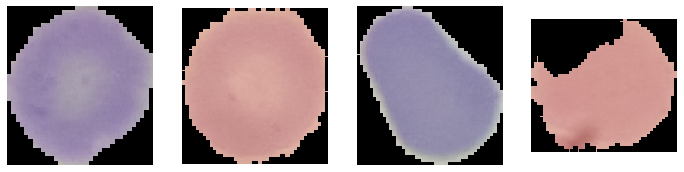

In [94]:
images = [open_image(i) for i in images_path]
show_all(images)

## OpenVINO Installation


In [36]:
cd /content

/content


In [37]:
!wget "https://storage.googleapis.com/open_vino_public/openvino_initialization_script.py"
!python openvino_initialization_script.py

--2020-03-08 17:35:18--  https://storage.googleapis.com/open_vino_public/openvino_initialization_script.py
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3148 (3.1K) [application/octet-stream]
Saving to: ‘openvino_initialization_script.py’

openvino_initializa 100%[===================>]   3.07K  --.-KB/s    in 0s      

2020-03-08 17:35:18 (51.0 MB/s) - ‘openvino_initialization_script.py’ saved [3148/3148]

--2020-03-08 17:35:23--  https://storage.googleapis.com/open_vino_public/l_openvino_toolkit_p_2020.1.023.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 2404:6800:4003:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 508213676 (485M) [applicati

In [0]:
install_dir = "/opt/intel/openvino/"
model_optimizer = "/opt/intel/openvino/deployment_tools/model_optimizer/"
deployment_tools = "/opt/intel/openvino/deployment_tools/"
model_zoo = '/opt/intel/openvino/deployment_tools/open_model_zoo/'

## Applying Inference

In [95]:
!source /opt/intel/openvino/bin/setupvars.sh &&\
 python3 infer.py -d CPU -m ir/model_fastai.xml \
  --labels sample.classes \
  -nt 1 -i {images_path[0]} {images_path[1]} {images_path[2]} {images_path[3]}

[setupvars.sh] OpenVINO environment initialized
[ INFO ] Loading network files:
	ir/model_fastai.xml
	ir/model_fastai.bin
[ INFO ] Preparing input blobs
[ INFO ] Loading model to the plugin
[ INFO ] Starting inference)
[ INFO ] Processing output blob
[ INFO ] Top 1 results: 
Image data/train/Uninfected/C164P125ThinF_IMG_20151116_120135_cell_129.png
0.9887540 label Uninfected

Image data/train/Uninfected/C143P104ThinF_IMG_20151005_225454_cell_145.png
0.9996816 label Uninfected

Image data/train/Uninfected/C202ThinF_IMG_20151015_151736_cell_14.png
0.9954286 label Uninfected

Image data/train/Uninfected/C101P62ThinF_IMG_20150923_170246_cell_44.png
0.8437256 label Uninfected

